Mean Squared Error: 0.03


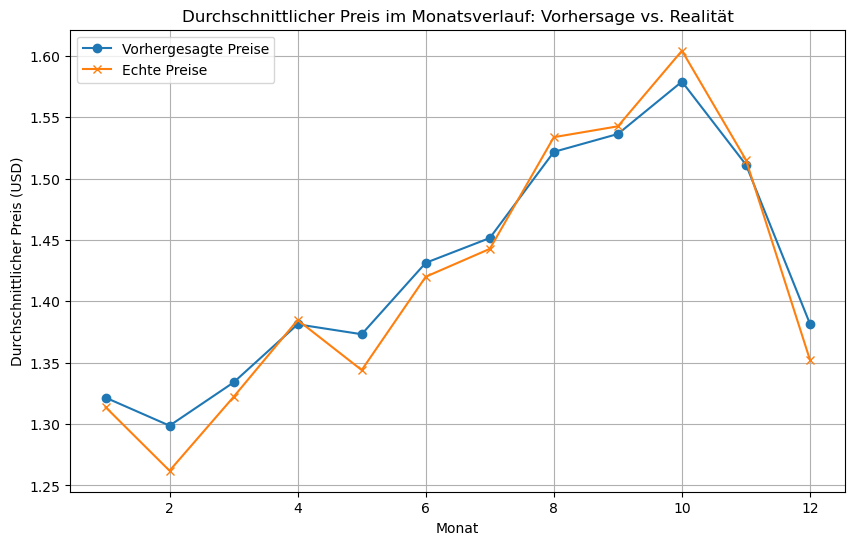

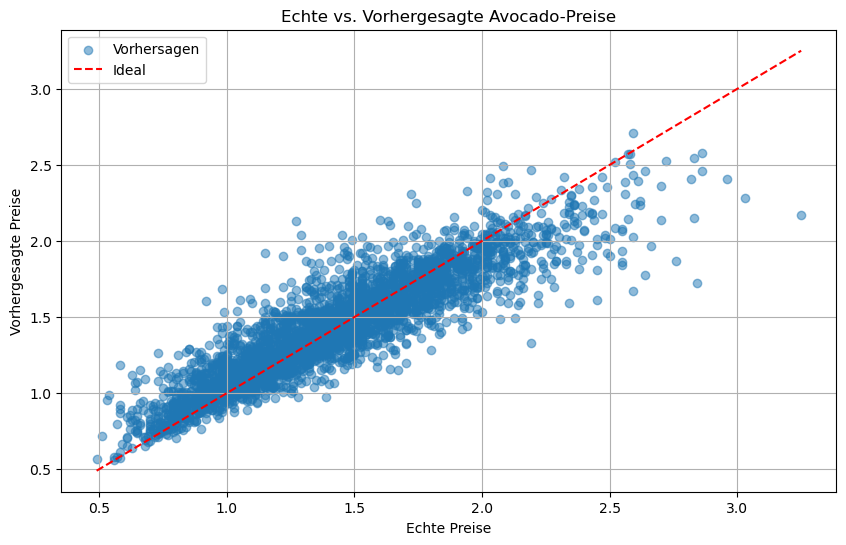

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


data_path = 'Dataset/avocado.csv'  
data = pd.read_csv(data_path)

# Datumsformat umwandeln
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
data['month'] = data['Date'].dt.month
data['week'] = data['Date'].dt.isocalendar().week

# Features und Zielvariable definieren
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'month', 'week']
X = data[features]
y = data['AveragePrice']

# Daten in Trainings- und Testdaten aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modell erstellen und trainieren
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


# Plot: Vorhergesagte vs. echte Preise 
X_test['PredictedPrice'] = y_pred
X_test['ActualPrice'] = y_test.values
monthly_comparison = X_test.groupby('month')[['PredictedPrice', 'ActualPrice']].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_comparison.index, monthly_comparison['PredictedPrice'], marker='o', label='Vorhergesagte Preise')
plt.plot(monthly_comparison.index, monthly_comparison['ActualPrice'], marker='x', label='Echte Preise')
plt.xlabel('Monat')
plt.ylabel('Durchschnittlicher Preis (USD)')
plt.title('Durchschnittlicher Preis im Monatsverlauf: Vorhersage vs. Realität')
plt.legend()
plt.grid(True)
plt.show()

# Plot der echten vs. vorhergesagten Preise
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Vorhersagen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Ideal')
plt.xlabel('Echte Preise')
plt.ylabel('Vorhergesagte Preise')
plt.title('Echte vs. Vorhergesagte Avocado-Preise')
plt.legend()
plt.grid(True)
plt.show()

